# getting the data

We will fetch the data from the habitat api and store it in a file.
The reason we are not directly importing the json into our data structure is to have reproducible steps and data when training and especially evaluating our model.

### fetching the data from the api

In [18]:
import urllib.request, json
with urllib.request.urlopen("https://habitat-lifesupport.herokuapp.com/measurements?token=Gafdiweq931") as url:
    data = json.loads(url.read())

### saving to file

In [17]:
with open("measurements.json", "w") as file:
    json.dump(data, file)

### loading data from file into a panda dataframe

In [2]:
import pandas as pd
with open("measurements.json") as file:
    data = pd.read_json(file)

### make usable features (feature extension?)

We need to change the date to some number that a linear regression model can actually use.
Before we go into some of the more involved methods like 1-of-K encoding, we are going to try to extract some numbers from the date.

#### extract hour and month

In [24]:
data['hour'] = pd.DatetimeIndex(data['measuredAt']).hour
data['month'] = pd.DatetimeIndex(data['measuredAt']).month
data['year'] = pd.DatetimeIndex(data['measuredAt']).year

### create a test set

In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

### split into features and label

In [39]:
feature_attributes = ['temperature', 'year', 'hour', 'month']
label_attributes = ['humidity']
X_train, y_train = train_set[feature_attributes], train_set[label_attributes]
X_test, y_test = test_set[feature_attributes], test_set[label_attributes]

### explore the data

In [28]:
X_train.describe()

,temperature,year,hour,month
count,3969.000000,3969.000000,3969.000000,3969.000000
mean,19.349257,2017.008566,11.449483,8.946334
std,2.074631,0.092169,6.928860,2.170038
min,15.200000,2017.000000,0.000000,1.000000
25%,17.600000,2017.000000,5.000000,7.000000
50%,19.000000,2017.000000,11.000000,9.000000
75%,21.200000,2017.000000,17.000000,11.000000
max,24.500000,2018.000000,23.000000,12.000000


In [29]:
y_train.describe()

,humidity
count,3969.000000
mean,61.351600
std,6.660233
min,29.500000
25%,57.100000
50%,62.100000
75%,66.200000
max,79.900000


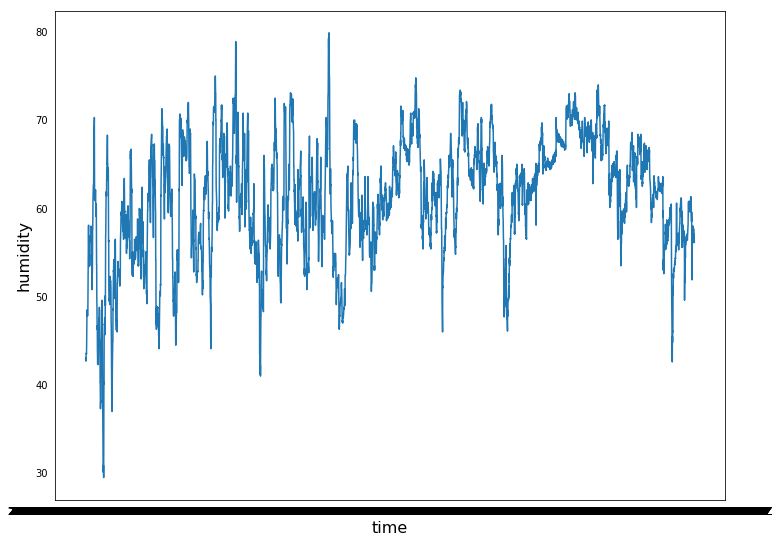

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.xlabel("time", fontsize=16)
plt.ylabel("humidity", fontsize=16)
x = data['measuredAt']
y = data['humidity']


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    
  
plt.plot(x, y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127edb70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1112bb5f8>]], dtype=object)

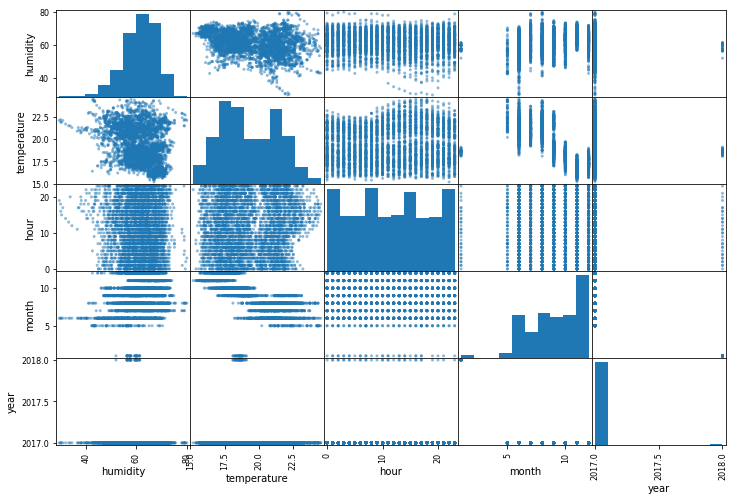

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(12, 8))

In [9]:
X_train.shape

(3969, 2)

In [10]:
y_train.shape

(3969, 1)

## train model

### linear regression

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


6.0433553205004813